<a href="https://colab.research.google.com/github/brocbroc/2P08_Data_Challenge/blob/main/Data_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("/content/drive/My Drive/2P08_notebooks/assets/team12_crime.csv")
print(df.shape)

(700, 9)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   incident_id     700 non-null    int64  
 1   date            700 non-null    object 
 2   neighborhood    700 non-null    object 
 3   crime_type      700 non-null    object 
 4   time_of_day     700 non-null    object 
 5   resolved        700 non-null    bool   
 6   property_value  662 non-null    float64
 7   arrests_made    700 non-null    int64  
 8   response_time   670 non-null    float64
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 44.6+ KB


In [9]:
df.head()

,incident_id,date,neighborhood,crime_type,time_of_day,resolved,property_value,arrests_made,response_time
0,1,2023-05-25,Commercial,Assault,Night,False,755.39,0,38.0
1,2,2023-04-19,Commercial,Theft,Afternoon,False,85.95,0,19.0
2,3,2023-01-21,Downtown,Vandalism,Afternoon,True,2579.09,0,13.0
3,4,2023-01-16,Commercial,Assault,Evening,True,1359.15,0,24.0
4,5,2023-11-04,Residential,Vandalism,Evening,True,968.88,0,9.0


In [10]:
df.isnull().sum()

,0
incident_id,0
date,0
neighborhood,0
crime_type,0
time_of_day,0
resolved,0
property_value,38
arrests_made,0
response_time,30


Note that the columns property_value and response_time have missing data.

In [11]:
df.describe()

,incident_id,property_value,arrests_made,response_time
count,700.00000,662.000000,700.000000,670.000000
mean,350.50000,990.481148,0.408571,19.450746
std,202.21688,686.291481,0.559926,13.341097
min,1.00000,17.880000,0.000000,2.000000
25%,175.75000,473.017500,0.000000,9.000000
50%,350.50000,853.330000,0.000000,16.000000
75%,525.25000,1334.675000,1.000000,28.000000
max,700.00000,4794.430000,2.000000,60.000000


First, we fix column data types. The date column should be of type datetime and the neighborhod, crime_type, and time_of_day columns should be of type string

In [12]:
df = df.astype({'date': 'string', 'neighborhood': 'string', 'crime_type': 'string', 'time_of_day': 'string'})
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   incident_id     700 non-null    int64         
 1   date            700 non-null    datetime64[ns]
 2   neighborhood    700 non-null    string        
 3   crime_type      700 non-null    string        
 4   time_of_day     700 non-null    string        
 5   resolved        700 non-null    bool          
 6   property_value  662 non-null    float64       
 7   arrests_made    700 non-null    int64         
 8   response_time   670 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), string(3)
memory usage: 44.6 KB


We fill the missing data in the columns property_value and response_time with the mean of those columns.

In [13]:
df['property_value'].fillna(df['property_value'].mean())
df['response_time'].fillna(df['response_time'].mean())

,response_time
0,38.000000
1,19.000000
2,13.000000
3,24.000000
4,9.000000
...,...
695,14.000000
696,6.000000
697,43.000000
698,19.450746


Now, we check for inconsistencies in the columns neighborhood, crime_type, and time_of_day.

In [14]:
pd.Series(df['neighborhood']).unique()

<StringArray>
['Commercial', 'Downtown', 'Residential', 'Industrial', 'Suburbs']
Length: 5, dtype: string

In [15]:
pd.Series(df['crime_type']).unique()

<StringArray>
['Assault', 'Theft', 'Vandalism', 'Burglary', 'Drug-related']
Length: 5, dtype: string

In [16]:
pd.Series(df['time_of_day']).unique()

<StringArray>
['Night', 'Afternoon', 'Evening', 'Morning']
Length: 4, dtype: string

No inconsistencies are observed in the columns. Now, we check for outliers in the data by plotting the frequency for each column.

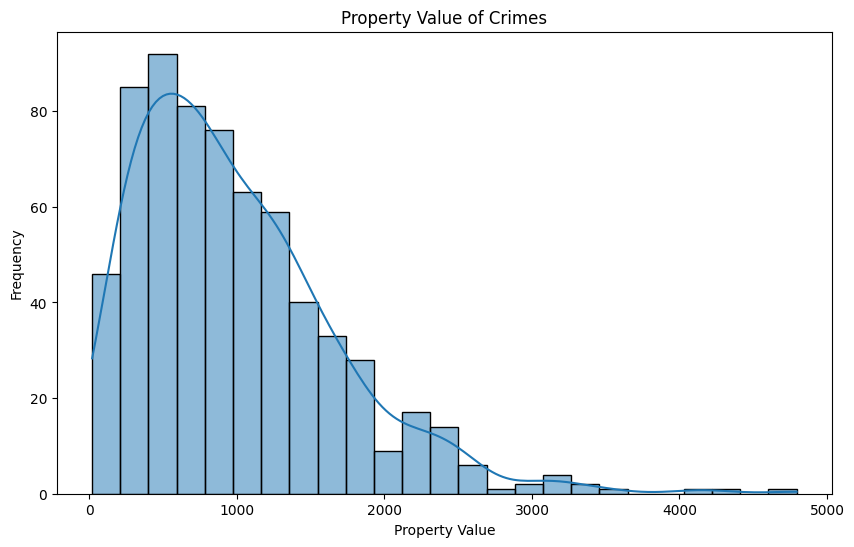

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['property_value'], kde=True)
plt.title('Property Value of Crimes')
plt.xlabel('Property Value')
plt.ylabel('Frequency')
plt.show()

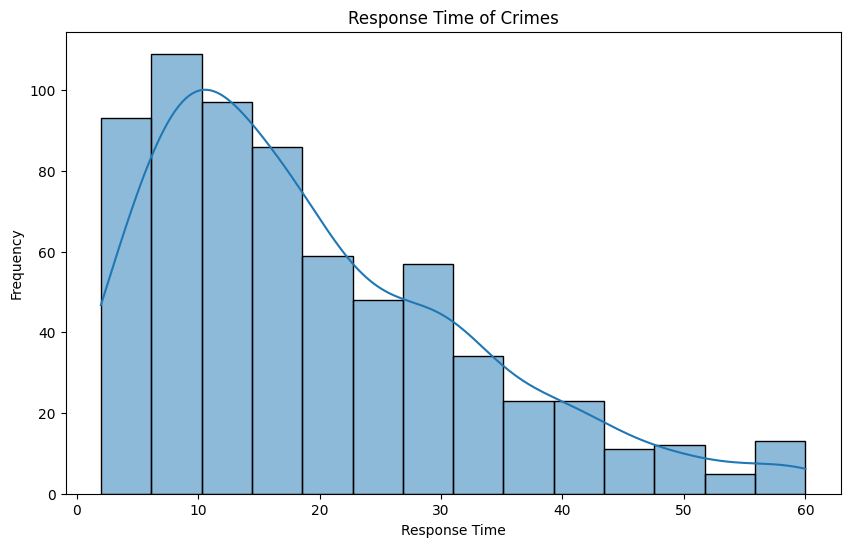

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['response_time'], kde=True)
plt.title('Response Time of Crimes')
plt.xlabel('Response Time')
plt.ylabel('Frequency')
plt.show()

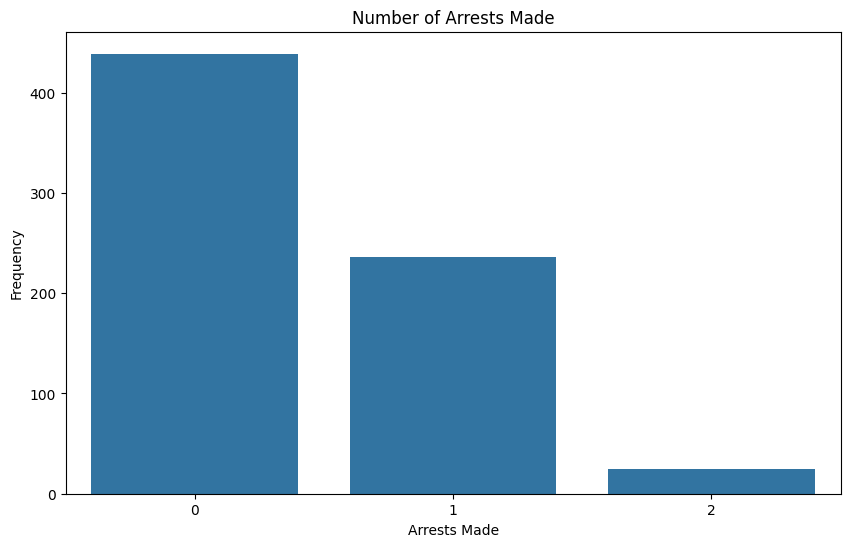

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data = df, x = 'arrests_made')
plt.title('Number of Arrests Made')
plt.xlabel('Arrests Made')
plt.ylabel('Frequency')
plt.show()

From the plots, we observe that there do not appear to be any significant outliers in the property_value, response_time, or arrests_made columns.